# Πανεπιστήμιο Κρήτης, Τμήμα Βιολογίας
# Τελικές εξετάσεις - εαρινό εξάμηνο 2022
# ΗΥ-494 Εισαγωγή στον προγραμματισμό. 
## 17 Ιουνίου 2022

# Θέμα 1

Στα πειράματα αλληλούχισης επόμενη γενιάς χρησιμοποιούμε έναν κώδικα για να περιγράψουμε τη πιθανότητα ένα νουκλεοτίδιο να έχει "διαβαστεί" λάθος κατά την αλληλούχιση. Ο κώδικας αυτός αντιστοιχεί έναν χαρακτήρα (δηλαδή ένα  string με μέγεθος 1) σε μία τιμή της πιθανότητας λάθους. Ο κώδικας είναι ο εξής:

* Η πλατφόρμα αλληλούχισης, εκτός από το γράμμα του νουκλεοτιδίου (A, C, G ή Τ) παράγει και τη πιθανότητα το γράμμα αυτό να είναι λάθος. Έστω P αυτή η πιθανότητα.
* Στη συνέχεια υπολογίζεται το Q score ή αλλιώς [Phred quality score](https://en.wikipedia.org/wiki/Phred_quality_score) αυτής της πιθανότητας. Το score αυτό υπολογίζεται ως εξής Q = -10 * log<sub>10</sub>(P). Για παράδειγμα αν η πιθανότητα λάθους (P) είναι 0.01 (1 στα 100) τότε το phred quality score (ή αλλιώς Q) είναι 20.

Ο κώδικας που υπολογίζει το Q score είναι:


In [254]:
import numpy as np

def p_to_q(P):
    return int(-10*np.log10(P))

p_to_q(0.01)

20

* Στη συνέχεια κωδικοποιείται το Q χρησιμοποιώντας έναν χαρακτήρα. Ο χαρακτήρας αυτός είναι ο Q-οστός χαρακτήρας του παρακάτω string ([αν θέλετε διαβάστε περισσότερα εδώ](https://en.wikipedia.org/wiki/FASTQ_format)):

In [231]:
phred_list = ''.join(chr(x) for x in range(33, 127))

Για παράδειγμα ας υποθέσουμε ότι η πιθανότητα ένα νουκλεοτίδιο να διαβάστηκε λάθος είναι P=0.000012345. Τότε το γράμμα που θα χρησιμοποιήσουμε για να κωδικοποιήσουμε αυτό το λάθος είναι το `R`:


In [232]:
P = 0.000012345
Q = p_to_q(P)
print ( phred_list[ Q ] ) # Τυπώνει 'R'

R


Φτιάχτε μία συνάρτηση η οποία θα κάνει την αντίστροφη διαδικασία που περιγράφηκε παραπάνω. Η συνάρτηση θα παίρνει σαν παράμετρο ένα string το οποίο θα αποτελείται από ένα γράμμα. Η συνάρτηση θα επιστρέφει τη πιθανότητα του νουκλεοτιδίου να διαβάστηκε λάθος. 

Δίνονται μερικά παραδείγματα:


```python
f('R') # Επιστρέφει 1.2589254117941661e-05
f('A') # Επιστρέφει 0.000630957344480193
f('<') # Επιστρέφει 0.001995262314968879
```

Δίνεται επίσης ότι η αντίστροφη εξίσωση του Phred score είναι: P = 10<sup>-Q/10</sup>

# Θέμα 2

Ένα πείραμα κράτησε 20 μέρες. Για κάθε μέρα παίρναμε 10 μετρήσεις. Οι μετρήσεις αυτές βρίσκονται στη παρακάτω λίστα:

```python
measurements = [
 [41, 62, 57, 35, 78, 4, 21, 47, 58, 92],
 [11, 62, 91, 42, 6, 37, 29, 5, 27, 55],
 [50, 36, 1, 42, 100, 29, 63, 26, 21, 22],
 [74, 19, 87, 54, 18, 96, 17, 25, 18, 48],
 [2, 64, 38, 94, 8, 95, 6, 76, 34, 33],
 [92, 14, 48, 73, 3, 17, 72, 24, 50, 39],
 [2, 57, 14, 85, 7, 86, 69, 89, 82, 48],
 [89, 30, 77, 14, 26, 90, 23, 38, 9, 99],
 [64, 62, 36, 15, 37, 63, 77, 44, 80, 92],
 [21, 49, 99, 32, 5, 30, 14, 57, 100, 57],
 [53, 94, 51, 97, 52, 28, 95, 2, 17, 14],
 [52, 31, 18, 14, 87, 23, 61, 33, 32, 70],
 [6, 75, 99, 64, 86, 35, 85, 81, 16, 63],
 [91, 75, 36, 73, 20, 64, 19, 36, 41, 38],
 [66, 39, 55, 91, 88, 24, 37, 82, 8, 91],
 [30, 32, 70, 79, 38, 3, 19, 14, 68, 6],
 [49, 89, 85, 74, 41, 36, 30, 95, 43, 12],
 [47, 54, 62, 85, 2, 23, 12, 72, 57, 46],
 [20, 94, 76, 29, 99, 46, 18, 75, 88, 41],
 [50, 73, 54, 83, 87, 66, 2, 4, 44, 98],
]
```

Σε ποια μέρα, το άθροισμα των τριών μεγαλύτερων μετρήσεων αυτής της μέρας, ήταν το μικρότερο;

Φτιάξτε μία συνάρτηση η οποία θα παίρνει μία παράμετρο. Η παράμετρος θα είναι μία λίστα με την ίδια δομή όπως η `measurements`. Η συνάρτηση θα επιστρέφει την απάντηση στο παραπάνω ερώτημα. Η απάντηση θα είναι ένας ακέραιος αριθμός από το 0 (1η μέρα) μέχρι το μήκος της λίστας μείον ένα (τελευταία μέρα). 


# Θέμα 3
Η παρακάτω λίστα περιέχει dictionaries. Κάθε dictionary περιέχει τα εξής κλειδιά / τιμές:
* name: Περιέχει το όνομα του γονιδίου (τυχαίο)
* start: Οι θέσεις που ξεκινάνε κάθε ένα από τα exons του.
* end: Οι θέσεις που τερματίζουν κάθε ένα από τα exons του. 

```python
genes = [
 {'name': 'VLDZ',
  'start': [1335, 2287, 3395, 4344],
  'end': [1568, 2727, 3976, 4864]
 },
 {'name': 'SUVM',
  'start': [1014, 2064, 3131, 4335],
  'end': [1608, 2670, 3583, 4775]
 },
 {'name': 'AMPM',
  'start': [1386, 2305, 3306, 4010, 5394, 6260],
  'end': [1972, 2786, 3710, 4601, 5871, 6702]
 },
 {'name': 'ZNYP',
  'start': [1025, 2272, 3185, 4225, 5159, 6362],
  'end': [1942, 2679, 3552, 4584, 5961, 6725]
 },
 {'name': 'DVLY',
  'start': [1221, 2330, 3013, 4240, 5386, 6230],
  'end': [1533, 2571, 3737, 4747, 5895, 6922]
 },
 {'name': 'SSMU', 
  'start': [1096, 2253, 3170],
  'end': [1923, 2801, 3611]},
 {'name': 'KAEX',
  'start': [1013, 2010, 3398, 4292],
  'end': [1973, 2771, 3864, 4982]
 },
 {'name': 'ZTDU',
  'start': [1177, 2250, 3225, 4132, 5040, 6099],
  'end': [1676, 2682, 3915, 4688, 5723, 6956]
 },
 {'name': 'NQSP',
  'start': [1399, 2377, 3163, 4229],
  'end': [1513, 2589, 3695, 4550]},
 {'name': 'MXWY', 
  'start': [1082, 2052, 3292], 
  'end': [1726, 2581, 3865]
 }
]
```

Για παράδειγμα το 2o exon του γονιδίου `VLDZ`, ξεκινάει στη θέση 2287 και τελειώνει στη θέση 2727. To μέγεθος του 2ου exon του γονιδίου `VLDZ` είναι 2727-2287=440.

Φτιάξτε μία συνάρτηση η οποία θα παίρνει μία παράμετρο. Η παράμετρος θα είναι μία λίστα με την ίδια δομή όπως η λίστα `genes`. Η συνάρτηση θα επιστρέφει το όνομα του γονιδίου το οποίο έχει το μεγαλύτερο σε μέγεθος exon. 


# Θέμα 4

Στις φετινές πανελλήνιες, στα μαθηματικά, "έπεσε" η μελέτη της συνάρτησης f(x)=e<sup>x</sup>-3x. Η αλλιώς:




In [234]:
import numpy as np
def f(x):
    return np.exp(x)-3*x


Ας τη πλοτάρουμε για Χ από 0 μέχρι 2:

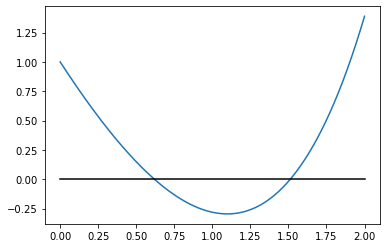

In [235]:
import matplotlib.pyplot as plt

X = np.linspace(0,2,1000)
Y = f(X)
fig, ax = plt.subplots()
ax.plot(X, Y)
ax.plot([0, 2], [0, 0], c='black') # Βάζουμε και τον άξονα Χ σε μαύρο


Όπως παρατηρείτε από τη γραφική παράσταση, η συνάρτηση αυτή τέμνει τον άξονα Χ σε 2 σημεία. Το πρώτο είναι μεταξύ του 0 και το 1 και το δεύτερο μεταξύ του 1 και του 2. Άρα η εξίσωση f(x)=0 έχει 2 λύσεις, μία μέσα σε κάθε ένα από αυτά τα διαστήματα. Η ακριβής λύση αυτης της εξίσωσης είναι πολύ δύσκολο να βρεθεί. Ευτυχώς όμως χρησιμοποιώντας τη python μπορούμε να προσεγγίσουμε αριθμητικά τη λύση με αρκετά μεγάλη ακρίβεια. 

Φτιάξτε μία συνάρτηση με το όνομα `sol` η οποία θα παίρνει 3 παραμέτρους. Η πρώτη θα είναι μία συνάρτηση (έστω `f`) η δεύτερη θα είναι ένας αριθμός (έστω `a`) και η τρίτη ένας αριθμός (έστω `b`). Θα υποθέσουμε ότι υπάρχει σίγουρα μία τιμή μεταξύ του `a` και του `b` το οποίο μηδενίζει την f. 
Η συνάρτηση θα υπολογίζει τις τιμές της `f` ξεκινώντας από το `a` και "πηγαίνοντας" προς το `b` με βήμα 0.01. Δηλαδή στην αρχή θα υπολογίζει το `f(a)` μετά το `f(a+0.01)` μετά το `f(a+0.02)` κτλ. Όταν η τιμή της `f` αλλάξει πρόσιμο (δηλαδή από θετική γίνει αρνητική ή το αντίθετο) τότε η συνάρτηση πρέπει να σταματάει και να επιτρέφει τη τελευταία τιμή x, για την οποία εκτίμησε το f(x). Δίνονται μερικά παραδείγματα:

```python
import numpy as np
def f(x):
    return np.exp(x)-3*x

print (sol(f,0,1)) # τυπώνει 0.62
print (sol(f,1,2)) # τυπώνει 1.52
```

# Θέμα 5

Η παρακάτω συνάρτηση με το όνομα `create_5` δημιουργεί ένα αρχείο με το όνομα `ask_5.txt`. Τα περιεχόμενα του αρχείου είναι:

```
Name=Alex,Values=5,4,3,2
Name=Helen,Values=3,4,7,8
Name=Kostas,Values=9,5,4,3
Name=Maria,values=10,11,12,13
```

In [263]:
def create_5():
    with open('ask_5.txt', 'w') as f:
        f.write('Name=Alex,values=5,4,3,2\n')
        f.write('Name=Helen,values=3,4,7,8\n')
        f.write('Name=Kostas,values=9,5,4,3\n')
        f.write('Name=Maria,values=10,11,12,13\n')
        
    print ('I just created the file: ask_5.txt')

Φτιάξτε μία συνάρτηση η οποία θα παίρνει μία παράμετρο η οποία θα είναι string. Η παράμετρος θα περιέχει τη διαδρομή και το όνομα ενός αρχείου με την ίδια δομή όπως το `ask_5.txt`. Η συνάρτηση πρέπει να επιστρέφει μία λίστα. Για κάθε γραμμή του αρχείου η λίστα θα περιέχει ένα dictionary με τα εξής κλειδιά:
* `Name`: Περιέχει ένα string με αυτό που ακολουθεί το `=` μετά το `Name`.
* `values`: Περιέχει μία λίστα με ακέραιους οι οποίοι είναι οι τιμές που ακολουθούν το `=` μετά το `values`.

Για παράδειγμα θα πρέπει:

```python
create_5()

f('ask_5.txt') 
```
Επιστρέφει τη λίστα:
```python
[
    {'name': 'Alex', 'values': [5,4,3,2]},
    {'name': 'Helen', 'values': [3,4,7,8]},
    {'name': 'Kostas', 'values': [9,5,4,3]},
    {'name': 'Maria', 'values': [10,11,12,13]},
]
```


# Θέμα 6

Ποια είναι η πιθανότητα μία τυχαία ακολουθία DNA που αποτελείται από 6 νουκλεοτίδια να μην έχει κανένα συνεχόμενο γράμμα. Για παράδειγμα η ακολουθία: `GCATAT` δεν περιέχει κανένα συνεχόμενα γράμμα ενώ η ακολουθία `GCATAΑ` περιέχει 2 συνεχόμενα `Α`. Αυτό μπορούμε να το υπολογίσουμε "αναλυτικά" με λίγο θεωρία από τις πιθανότητες. Η πιθανότητα λοιπόν αυτή είναι:


In [237]:
p = 1 * (3/4)**5 
print (p) #  Τυπώνει: 0.2373046875

0.2373046875


Μπορούμε να επιβεβαιώσουμε ότι αυτή η πιθανότητα είναι σωστή; Φτιάξτε μία συνάρτηση η οποία δεν θα παίρνει κανένα όρισμα. Η συνάρτηση θα δημιουργεί 10.000 τυχαίες ακολουθίες DNA (strings δηλαδή που αποτελούνται μόνο από τα γράμματα A,C,G,T) με μέγεθος 6. Στη συνέχεια επιστρέψτε τον λόγο του πλήθους αυτών που δεν περιέχουν κανένα συνεχόμενο γράμμα προς το πλήθος όλων των ακολουθιών (10.000). 

Θα πρέπει δηλαδή:

```python
print (f()) # Τυπώνει έναν αριθμό κοντά στο 0.2373
```

# Θέμα 7

Ένα νούμερο ελληνικού κινητού τηλέφωνου μπορεί να γραφτεί με τους εξής τρόπους:

* 10 αριθμοί όπου οι πρώτοι 2 είναι το 69, π.χ.: `6912345678`
* Το ίδιο με πριν αλλά ακολουθεί το πρόθεμα `0030` ο οποίος είναι ο διεθνής τηλεφωνικός κωδικός για την Ελλάδα. Οπότε o ίδιος αριθμός με πριν μπορεί να γραφτεί σαν: `00306912345678`
* Αντί για το `00` όταν χρησιμοποιούμε τον διεθνή κωδικό, μπορούμε να χρησιμοποιήσουνε το `+`. Οπότε ο ίδιος αριθμός με πριν μπορεί να γραφτεί σαν: `+306912345678`.

Συμπληρώστε το regular expression της παρακάτω συνάρτησης έτσι ώστε όταν τη τρέχουμε να επιστρέφει `True` ή `False`, ανάλογα με το αν το string της παραμέτρου αναπαριστά έναν ελληνικό αριθμό τηλεφώνου ή όχι.


In [238]:
import re
def f(number):
    m = re.fullmatch(r'<ΒΑΛΤΕ ΕΔΩ ΤΟ REGULAR EXPRESSION>', number)
    return bool(m)

Μερικά παραδείγματα:
```python
print (f('6912345678')) # True
print (f('69123456789')) # False
print (f('6812345678')) # False
print (f('5912345678')) # False
print (f('00306912345678')) # True
print (f('00306812345678')) # False
print (f('+306912345678')) # True
print (f('+316912345678')) # False
print (f('+00306912345678')) # False
```

# Θέμα 8

Ο παρακάτω κώδικας φορτώνει ένα pandas DataFrame το οποίο περιέχει δύο στήλες:
* Η στήλη `symbol` περιέχει το όνομα ενός γονιδίου
* Η στήλη `alleles` περιέχει το πλήθος από "επικίνδυνες" μεταλάξεις που έχουν αναφερθεί σε αυτό το γονίδιο. 


In [255]:
import pandas as pd
def load_df():
    df = pd.read_csv(
        'https://ftp.ncbi.nlm.nih.gov/pub/clinvar/tab_delimited/gene_specific_summary.txt',
        skiprows=1,
        sep='\t',
        usecols=['#Symbol', 'Alleles_reported_Pathogenic_Likely_pathogenic'],
    )
    
    
    df = df[df['Alleles_reported_Pathogenic_Likely_pathogenic'] != '-']
    df.rename(columns={
        'Alleles_reported_Pathogenic_Likely_pathogenic': 'alleles',
        '#Symbol': 'symbol',
    }, inplace=True)
    df['alleles'] = pd.to_numeric(df['alleles'])
    df = df.reset_index(drop=True)
    
    return df

Φτιάξτε μία συνάρτηση η οποία δεν θα έχει καμία παράμετρο. Η συνάρτηση θα φορτώνει το DataFrame μέσω της συνάρτησης `load_df` και τη συνέχεια θα φτιάχνει ένα baplot όπου κάθε μπάρα θα αντιστοιχεί σε ένα από τα 20 γονίδια με τις περισσότερες μεταλλάξεις. Το ύψος της κάθε μπάρας κάθε γονιδίoυ θα είναι και το πλήθος από μεταλλάξεις που περιέχει. To barplot θα πρέπει να είναι κάπως έτσι:

<AxesSubplot:xlabel='symbol'>

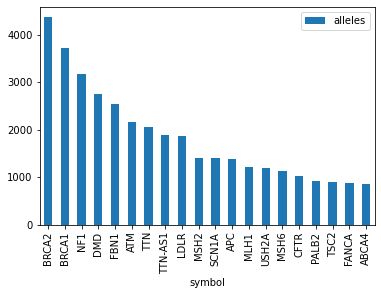

# Θέμα 9
Η παρακάτω συνάρτηση παράγει τη διακύμανση της τιμής 2 μετοχών για 200 μέρες, όπου και οι 2 μετοχές ξεκινάνε με τη τιμή 100 και κάθε μέρα προσθέτουμε μία τυχαία τιμή από το -0.5 μέχρι το 0.5. Οι τιμές επιστρέφονται σε μία λίστα η οποία περιέχει 200 tuples ένα για κάθε μέρα. Κάθε tuple περιέχει 2 τιμές, μία για κάθε μετοχή.

In [261]:
import random
def random_stocks():
    
    days = 200
    price_1 = 100
    price_2 = 100
    
    ret = [(price_1, price_2)]
    for x in range(days-1):
        price_1 += random.random() - 0.5
        price_2 += random.random() - 0.5
        ret.append((price_1, price_2))
        
    return ret

Η παρακάτω συνάρτηση (`plot_stocks`) φτιάχνει μία γραφική παράσταση με τη διακύμανση των τιμών των μετοχών. Η 1η μετοχή έχει χρώμα μπλε και η δεύτερη κόκκινο:

In [262]:
import matplotlib.pyplot as plt

def plot_stocks():
    Y = random_stocks()
    X = list(range(len(Y)))

    fig, ax = plt.subplots()
    
    ax.plot(X, [y[0] for y in Y], c='blue')
    ax.plot(X, [y[1] for y in Y], c='red')
    
    

Για παράδειγμα:

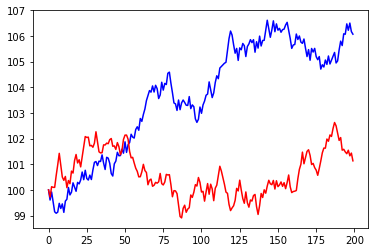

In [248]:
plot_stocks()

Μεταβάλετε τη συνάρτηση `plot_stocks` ώστε να εμφανίζεται μία κάθετη μαύρη γραμμή. Το X αυτής της γραμμής θα είναι η μέρα όπου η απόλυτη τιμή της διαφοράς των τιμών των δύο μετοχών είναι η μεγαλύτερη. Η γραμμή θα ξεκινάει από τη τιμή της μετοχής που έχει τη μικρότερη τιμή και θα σταματάει στη τιμή της μετοχής που έχει τη μεγαλύτερη τιμή. Ένα πράδειγμα δίνεται παρακάτω:


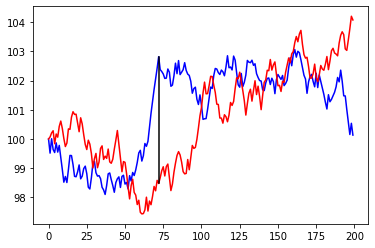

Σημείωση: η συνάρτηση  `abs(x)` επιστρέφει την απόλυτη τιμή της x:

In [259]:
abs(3)

3

In [260]:
abs(-3)

3

# Θέμα 10

Ο γονότυπος ενός ανθρώπου σε ένα σημείο του γονιδιώματός του που βρίσκεται σε ένα αυτοσωμικό χρωμόσωμα (μη-φυλετικό) είναι ένας συνδυασμός από δύο πιθανά αλλήλια. Το ένα το έχει κληρονομήσει από τον πατέρα του και το άλλο το έχει κληρονομήσει από τη μητέρα του. Εννοείται ότι αυτά τα δύο αλλήλια δεν είναι απαραίτητο να είναι διαφορετικά (ομοζυγωτία). Ας φτιάξουμε λοιπόν μία κλάση η οποία αναπαριστάει έναν άνθρωπο και αρχικοποιείται από τα αλλήλια τα οποία έχει σε μία γενετική θέση. Υποθέτουμε ότι ένα αλλήλιο είναι ένας ακέραιους αριθμός:

In [250]:
class P:
    def __init__(self, allele_1, allele_2):
        self.allele_1 = allele_1
        self.allele_2 = allele_2
        
    def __str__(self,):
        return f'{self.allele_1}/{self.allele_2}'

Τώρα μπορούμε να ορίσουμε τον Κώστα! Ο Κώστας σε μία αυτοσωμική γενετική θέση έχει κληρονομήσει το αλλήλιο 1 από τον πατέρα του και το αλλήλιο 2 από τη μητέρα του. Άρα ο Κώστας μπορεί να οριστεί ως εξής:


In [251]:
kostas = P(1,2)

Ο Κώστας γνωρίζει τη Μαρία. Η Μαρία στην ίδια γενετική θέση έχει κληρονομήσει το αλλήλιο 3 από τον πατέρα της και το αλλήλιο 4 από τη μητέρα της. Άρα μπορούμε να ορίσουμε τη Μαρία ως εξής:

In [252]:
maria = P(3,4)

O Κώστας και η Μαρία αποφασίζουν να κάνουν ένα παιδί. Τι γονότυπο θα έχει αυτό το παιδί; Στο 1ο σετ χρωμοσωμάτων (που παίρνει από τον πατέρα) θα κληρονομήσει το 1 ή το 2 και στο 2ο σετ (που παίρνει από τη μητέρα) θα κληρονομήσει το 3 ή το 4. Άρα οι πιθανοί γονότυποι του παιδιού μπορούν να είναι: 1/3, 1/4, 2/3, 2/4. Ή αλλιώς με πιθανότητα 50% θα κληρονομήσει το 1 ή το 2 στο 1ο σετ και με πιθανότητα 50% θα κληρονομήσει το 3 ή το 4 στο 2ο σετ. 

Προσθέστε λοιπόν τη μέθοδο `__add__` στη κλάση P η οποία θα έχει 2 παραμέτρους: τη `self` και την `other`. H μέθοδος θα δημιουργεί και θα επιστρέφει ένα νέο αντικείμενο της κλάσης `P`. Το αντικείμενο αυτό θα είναι ένα πιθανό παιδί του `self` με το `other`. Το νέο αντικείμενο που θα προκύπτει θα πρέπει να έχει για `allele_1` ή το  `self.allele_1` ή το `self.allele_2` με πιθανότητα 50%, και για `allele_2` θα πρέπει να έχει ή το `other.allele_1` ή το `other.allele_2` πάλι με πιθανότητα 50%. Δηλαδή θα πρέπει:

```python
paidi = kostas + maria
print (paidi) # Τυπώνει τυχαία ένα από 1/3, 1/4, 2/3, 2/4
```

Ας υποθέσουμε τώρα ότι έχουμε 2 τυχαίους ανθρώπους. Πόσο γενετικά όμοιοι είναι; Αυτό μπορούμε να το ορίσουμε ως εξής:
* Αν και οι δύο μοιράζονται τα ίδια 2 αλλήλια (δεν έχει σημασία αν είναι από τον πατέρα ή από την μητέρα), τότε η ομοιότητά τους είναι **1**. Για παράδειγμα αν ο ένας είναι 1/2 και ο άλλος είναι 1/2.
* Αν και οι δύο μοιράζονται μόνο 1 αλλήλιο, τότε η γενετική ομοιότητά τους είναι **0.5**. Για παράδειγμα αν ο ένας είναι 1/2 και άλλος είναι 2/3. 
* Αν δεν μοιράζονται κανένα αλλήλιο τότε η γενετική ομοιότητά τους είναι **0**. Για παράδειγμα αν ο ένας είναι 1/2 και ο άλλος είναι 3/4. 

Προσθέστε λοιπόν τη μέθοδο `similarity` στη κλάση `P` η οποία θα παίρνει σαν όρισμα εκτός από το `self`, τη παράμετρο `other` και θα επιστρέφει τη γενετική ομοιότητα μεταξύ του `self` και του `other`. Δίνονται μερικά παραδείγματα:

```python
person_1 = P(1,2)
person_2 = P(1,2)
print (person_1.similarity(person_2)) # Τυπώνει 1.0

person_1 = P(1,2)
person_2 = P(2,1)
print (person_1.similarity(person_2)) # Τυπώνει 1.0

person_1 = P(1,2)
person_2 = P(2,3)
print (person_1.similarity(person_2)) # Τυπώνει 0.5

person_1 = P(1,2)
person_2 = P(3,2)
print (person_1.similarity(person_2)) # Τυπώνει 0.5

person_1 = P(1,2)
person_2 = P(3,4)
print (person_1.similarity(person_2)) # Τυπώνει 0.0


```

#  Bonus! ( +1)

Αν έχετε υλοποιήσει τη 10 μπορείτε να βρείτε ποια είναι η γενετική ομοιότητα ([kinship](https://en.wikipedia.org/wiki/Kinship)) για οποιαδήποτε συγγενική σχέση!

Για παράδειγμα στον [πίνακα της wikipedia](https://en.wikipedia.org/wiki/Kinship#Degrees) αναφέρει ότι τα ετεροθαλή αδέρφια έχουν 25% γενετική ομοιότητα. Άραγε ισχύει αυτό; Ας το δούμε! Για αρχή θα φτιάξουμε 2 ετεροθαλή αδέρφια και θα μετρήσουμε την ομοιότητά τους:

```python

def half_siblings_similarity():
    parent_1 =  P(1,2) # γονέας 1
    parent_2 =  P(3,4) # γονέας 2
    child_1 = parent_1 + parent_2

    parent_3 = P(5,6) # γονέας 3..
    child_2 = parent_1 + parent_3
    
    # Τα child_1 και child_2 έχουν μόνο τον 1 γονέα κοινό

    return child_1.similarity(child_2)

```
Στη συνέχεια θα φτιάξουμε.. 10.000 τυχαία ζευγάρια από ετεροθαλή αδέλφια και θα μετρήσουμε τον μέσο όρο της ομοιότητάς τους:

```python

N = 10_000
s = sum(half_siblings_similarity() for x in range(N))
print (s/N) # Τυπώνει έναν αριθμό κοντά στο 0.25

```

Ας υποθέσουμε τώρα ότι ο Κώστας και η Μαρία έκαναν ένα παιδί, τον Γιώργο. Ο Κώστας έχει έναν αδερφό, τον Δημήτρη. Η Μαρία κάνει ένα παιδί με τον Δημήτρη, την Κατερίνα. Ποια είναι η γενετική ομοιότητα του Γιώργου με την Κατερίνα;
